# Database loading and analysis

In [3]:
%matplotlib inline
import json
import pymongo
from pymongo import MongoClient
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

/Users/lewisp123/Documents/Natural_Sciences_MSci/project/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
#mongourl= 'mongodb://localhost:27017/'
mongourl= 'mongodb://localhost:6666/'
client = MongoClient(mongourl)
ca = client['Cherry']['Cranberry']

In [13]:
curs = ca.find()
pubs = curs.distinct('publisher')
pubcounts = {p:0 for p in pubs}
for pub in pubs:
    pubcounts[pub] = ca.find({'publisher':pub}).count()
pubcounts2 = {k:v for k,v in pubcounts.items() if v>10000}
pubcounts3 = {k:v for k,v in pubcounts.items() if v<=10000}
pubcounts2['others'] = sum(pubcounts3.values())
labels = pubcounts2.keys()
counts = [pubcounts2[p] for p in labels]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colours=[]
for name, d in matplotlib.colors.cnames.iteritems():
    colours.append(name)
colors = colours[0:len(labels)]
patches, texts = plt.pie(counts, colors=colors,startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.legend(patches, labels)
plt.axis('equal')
plt.tight_layout()
plt.show()

ServerSelectionTimeoutError: localhost:6666: [Errno 61] Connection refused

In [5]:
def corp_analyse(corpus_file_name):
    lens = []
    with open(corpus_file_name,'r') as f:
        for line in f:
            l = line.strip()
            lens.append(len(l.split()))
    c = Counter(lens)
    words = [k*v for k,v in c.items()]
    mean_title_len = (sum(words)*1.)/sum(c.values())
    mode_title_len = c.values().index(max(c.values()))
    return (c.keys(),c.values(),mean_title_len,mode_title_len)

'''raw = corp_analyse('raw_corpus.txt')
second = corp_analyse('second_corpus.txt')
third = corp_analyse('third_corpus.txt')

plt.plot(raw[0],raw[1],'r')
plt.plot(second[0],second[1],'g')
plt.plot(third[0],third[1],'b')

plt.xlim([0,40])'''

"raw = corp_analyse('raw_corpus.txt')\nsecond = corp_analyse('second_corpus.txt')\nthird = corp_analyse('third_corpus.txt')\n\nplt.plot(raw[0],raw[1],'r')\nplt.plot(second[0],second[1],'g')\nplt.plot(third[0],third[1],'b')\n\nplt.xlim([0,40])"

(0, 40)

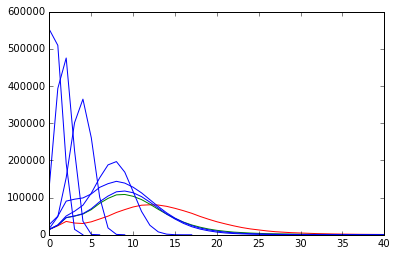

In [7]:
raw = corp_analyse('raw_corpus.txt')
second = corp_analyse('second_corpus.txt')
p05 = corp_analyse('tfidf_filtered_0_05.txt')
p1 = corp_analyse('tfidf_filtered_0_1.txt')
p2 = corp_analyse('tfidf_filtered_0_2.txt')
p3 = corp_analyse('tfidf_filtered_0_3.txt')
p4 = corp_analyse('tfidf_filtered_0_4.txt')
p5 = corp_analyse('tfidf_filtered_0_5.txt')
p6 = corp_analyse('tfidf_filtered_0_6.txt')
p7 = corp_analyse('tfidf_filtered_0_7.txt')
p8 = corp_analyse('tfidf_filtered_0_8.txt')
plt.plot(raw[0],raw[1],'r')
plt.plot(second[0],second[1],'g')
plt.plot(p05[0],p05[1],'b')
plt.plot(p1[0],p1[1],'b')
plt.plot(p2[0],p2[1],'b')
plt.plot(p3[0],p3[1],'b')
plt.plot(p4[0],p4[1],'b')
plt.plot(p5[0],p5[1],'b')
#plt.plot(p6[0],p6[1],'b')
#plt.plot(p7[0],p7[1],'b')
#plt.plot(p8[0],p8[1],'b')

plt.xlim([0,40])